<a href="https://colab.research.google.com/github/MahmoodInamdar/Python-projects-MI/blob/main/Stroke_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

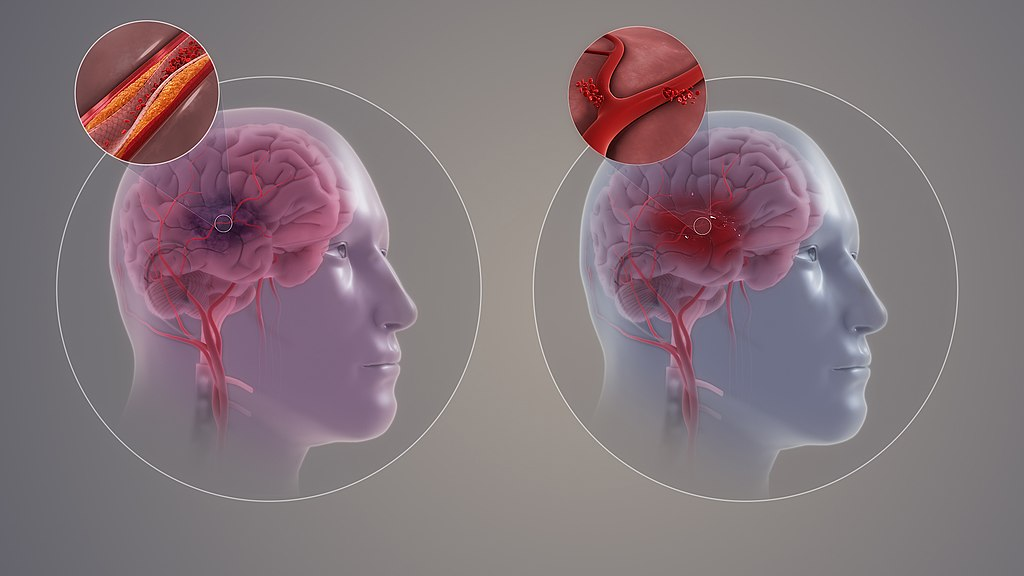

In [9]:
import IPython.display

image_address = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Types_of_Stroke.jpg/1024px-Types_of_Stroke.jpg"    # or for example "image.jpg"
IPython.display.Image(image_address)

**Mahmood Inamdar: GH1023619**

This will be my final Assessment which will be submitted on canvas.

The Data which is used by me is Heart Stroke Prediction based on few features labels.

Heart Stroke Prediction (2022). Available at: https://www.kaggle.com/datasets/swetha0406/heart-stroke-prediction.



Below I have imported all the libraries together which are:

1. Pandas for Data. 
2. Model selection for grid search.
3. sklearn.metrics for support vector machine.
4. sklearn.preprocessing for Encoding and Building a standardization model.
5. sklearn.decomposition for reducing the dimentionality. 
6. imblearn.over_sampling for SMOTE


In [6]:
import pandas as pd
import sklearn.model_selection
import sklearn.svm
import sklearn.metrics
import sklearn.preprocessing
import imblearn.over_sampling
import sklearn.decomposition
import numpy as np



**Importing Data:**

The Data Stroke.csv has in total of 43410 rows and 11 coloums. 

Features such as:
1. Gender ( male, Female)
2. Age (Int)
3. Hypertension (0=no,1=yes)
4. Heart Disease (0=no,1=yes)
5. Ever_Married	(no , yes)
6. Work_Type (children,Private,Self-employed,Govt_job)
7. Residence_Type	( Rural , Urban )
8. Avg_Glucose_Level	(Float)
9. BMI	(Float)
10. Smoking_Status	(null,never smoked,formerly smoked
,smokes)

Target Label:

11. Stroke.

In the below steps, I have imported the data and added it to a variable df (data frame).

As of now, I will go ahead with the sample of 5000 dataset to complete the pipeline.

Just to remove the non important feature which is 'ID' which has been dropped from my dataset moving forward. 

Printing my data head just to check if the data was properly updated and ID was removed or not. 


In [4]:
df = pd.read_csv("Stroke.csv")
df = df.sample(10000)
df = df.drop(['ID'], axis=1)

df.head(2)

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
37933,Female,21.0,0,0,No,Private,Urban,86.33,36.3,smokes,0
7244,Male,41.0,0,0,Yes,Govt_job,Rural,94.57,29.0,never smoked,0


**Converting Age feature label to integer**.


In [7]:
df.Age = df.Age.astype(int)

**Printing the data head just for checking my data.**






In [8]:
df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
37933,Female,21,0,0,No,Private,Urban,86.33,36.3,smokes,0
7244,Male,41,0,0,Yes,Govt_job,Rural,94.57,29.0,never smoked,0
35457,Female,34,0,0,Yes,Private,Urban,107.34,23.1,never smoked,0
13936,Female,21,0,0,No,Private,Urban,100.94,28.1,never smoked,0
34540,Female,48,0,0,Yes,Govt_job,Rural,105.30,21.8,smokes,0


In the below step, 

I have splitted the data in df train and df test to avoid data leakage and be fair with the testing model. To make sure that the final model works as predicted, test and training data are seperated.

1. Train Data - The model will be trained with the training set and learn from the data and parameters. 

2. Test Data - The model will be used to test the final model and evaluate the final algorithm. 

In [9]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print("df_train size:" , df_train.shape)
print("df_test size:" , df_test.shape)

df_train size: (7500, 11)
df_test size: (2500, 11)


## **`Data preprosessing and feature engineering:`**


**Data exploration**
  
  Using For loop to check if the train set has any explicit or implicit value. 

  In the coloumn Age: 

  I have found 1 implicit value which is '0'. 

  In the coloumn Smoking_Status:

  I have found an explicit value which is a null value 'nan'.




In [10]:
for i in df_train.columns:
  print(i)
  print(df_train[i].unique(),"\n")

Gender
['Female' 'Male' 'Other'] 

Age
[51 44 78 39 49 61 27  7 37  5 40 18 31 15  3 16 73 57 70 56 74 36 71 76
 24  4 80 67 53 33 25 13 68 22  2 55 52 42 66 32 17 34 45 29 60 48 43 75
 23 11 35 50 28 79 21 58  0 14 47 12 65 62  1 54  6 41 46 26 63 82 69  8
 30 64 10 81  9 20 77 19 38 59 72] 

Hypertension
[0 1] 

Heart_Disease
[0 1] 

Ever_Married
['Yes' 'No'] 

Work_Type
['Govt_job' 'Private' 'Self-employed' 'children' 'Never_worked'] 

Residence_Type
['Rural' 'Urban'] 

Avg_Glucose_Level
[ 80.64 115.91  56.95 ... 122.68 226.51 164.11] 

BMI
[28.6 22.9 26.  26.6 25.1 40.7 27.1 35.2 17.1 32.3 19.9 28.1 15.5 20.8
 19.1 37.1 26.3 21.7 28.2 29.  32.7  nan 33.8 29.5 25.2 22.7 15.2 30.3
 36.2 37.7 37.4 23.2 31.4 35.7 47.6 17.9 39.6 24.2 24.6 20.1 32.1 27.8
 21.2 22.8 34.5 30.2 38.1 22.5 30.4 23.1 21.3 22.6 40.  24.3 30.1 13.9
 33.  26.1 20.2 25.8 21.  28.8 37.9 26.7 31.5 33.4 18.4 30.7 31.8 30.6
 21.1 34.9 31.2 28.  27.3 29.2 18.3 34.8 23.  43.9 31.3 19.2 35.  36.9
 29.8 31.1 20.6 39.4 19.

Checking how many null values are present in my training set.

In [11]:
df_train.isnull().sum()

Gender                  0
Age                     0
Hypertension            0
Heart_Disease           0
Ever_Married            0
Work_Type               0
Residence_Type          0
Avg_Glucose_Level       0
BMI                   262
Smoking_Status       2271
Stroke                  0
dtype: int64

Replacing all the implicit missing values to null values and dropping them.

Replacing all the explicit  values to null values and dropping them.


In [12]:
df_train = df_train.replace(" ", pd.NaT)   
df_train["Age"] = df_train["Age"].replace(0, pd.NaT)
df_train = df_train.dropna()


df_test = df_test.replace(" ", pd.NaT)     
df_test["Age"] = df_test["Age"].replace(0, pd.NaT)
df_test = df_test.dropna()



print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df_train size: (5048, 11)
df_test size: (1692, 11)


**Checking my data head and tail. **


In [13]:
df_train.head(10)

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
34536,Female,51,0,0,Yes,Govt_job,Rural,80.64,28.6,never smoked,0
14598,Male,44,0,0,Yes,Private,Urban,115.91,22.9,never smoked,0
19965,Male,39,0,0,No,Private,Urban,96.18,26.6,never smoked,0
19804,Male,49,0,0,Yes,Self-employed,Urban,75.76,25.1,smokes,0
36413,Male,61,0,0,Yes,Self-employed,Rural,65.09,40.7,never smoked,0
26509,Male,27,0,0,No,Private,Urban,94.18,27.1,formerly smoked,0
3861,Male,37,0,0,Yes,Govt_job,Urban,156.69,35.2,never smoked,0
29674,Female,40,0,0,Yes,Govt_job,Urban,80.99,32.3,never smoked,0
16954,Female,31,0,0,Yes,Private,Rural,141.14,28.1,never smoked,0
36095,Female,31,0,0,Yes,Private,Urban,88.98,37.1,formerly smoked,0


***Checking my data head and tail. ***


In [14]:
df_train.tail(10)

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
8874,Female,41,0,0,Yes,Private,Urban,109.68,26.5,smokes,0
16997,Female,31,0,0,Yes,Private,Urban,99.99,40.3,never smoked,0
14896,Male,20,0,0,No,Private,Rural,73.24,22.3,never smoked,0
18659,Female,49,0,0,No,Private,Rural,86.04,24.8,formerly smoked,0
27198,Female,42,0,0,No,Private,Rural,198.52,25.6,formerly smoked,0
1984,Female,59,0,0,No,Private,Urban,74.35,28.0,never smoked,0
27497,Female,22,0,0,Yes,Private,Rural,84.21,25.0,smokes,0
34220,Male,45,0,0,Yes,Self-employed,Rural,122.68,26.2,never smoked,0
22480,Female,76,0,0,Yes,Self-employed,Urban,90.56,29.1,never smoked,0
33536,Female,42,0,0,Yes,Private,Urban,164.11,27.6,formerly smoked,0


**Re-checking if all the values are properly update after replacing them and dropping them.**

In [15]:
for i in df_train.columns:
  print(i)
  print(df_train[i].unique(),"\n")

Gender
['Female' 'Male'] 

Age
[51 44 39 49 61 27 37 40 31 73 57 70 56 18 36 71 76 24 80 67 25 68 22 42
 66 32 34 45 29 78 43 23 15 35 50 79 17 16 58 21 47 65 62 54 41 46 33 26
 63 82 69 53 28 13 60 74 30 52 64 55 75 48 20 77 19 38 59 81 72 12 11 14
 10] 

Hypertension
[0 1] 

Heart_Disease
[0 1] 

Ever_Married
['Yes' 'No'] 

Work_Type
['Govt_job' 'Private' 'Self-employed' 'Never_worked' 'children'] 

Residence_Type
['Rural' 'Urban'] 

Avg_Glucose_Level
[ 80.64 115.91  96.18 ...  84.21 122.68 164.11] 

BMI
[28.6 22.9 26.6 25.1 40.7 27.1 35.2 32.3 28.1 37.1 26.3 21.7 28.2 29.
 32.7 33.8 29.5 25.2 22.7 36.2 37.4 35.7 47.6 39.6 24.6 32.1 27.8 30.2
 38.1 22.5 23.1 22.6 24.3 30.1 33.  26.1 25.8 40.  21.  37.9 31.5 18.4
 31.8 30.6 21.1 34.9 31.2 28.  27.3 29.2 34.8 31.3 35.  31.1 20.6 39.4
 34.3 26.9 29.7 37.3 28.3 50.4 29.1 33.9 29.4 20.2 30.5 50.5 20.3 19.7
 41.5 33.2 32.6 32.  27.9 27.7 33.3 34.  17.2 37.2 35.5 29.8 31.6 33.4
 38.6 20.1 50.1 38.4 37.7 25.5 21.6 24.7 32.8 36.1 20.  29.3 46

**Splitting the data** 



Data frame (df train) to x train and y train (for training the model)
Data frame (df test) to x test and y test (for testing the model)

In [16]:
x_train = df_train.drop(["Stroke"], axis=1)   
y_train = df_train["Stroke"]

x_test = df_test.drop(["Stroke"], axis=1)   
y_test = df_test["Stroke"]

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (5048, 10)
y_train size: (5048,)
x_test size: (1692, 10)
y_test size: (1692,)


**Encode categorical features as a one-hot numeric array.**


We will encode our data x train and x test to make it into integer or string (array) so that it will create a binary data and a sparse matrix. This will make our data more friendly and easy. 


In [17]:
## Encoding categorical Attributes

from sklearn.preprocessing import OneHotEncoder

#Building the one-hot encoder model
encode = OneHotEncoder(handle_unknown='ignore')
encode.fit(x_train)

#Encoding the categorical attributes of training data
x_train = encode.transform(x_train)

#Encoding the categorical attributes of test data
x_test = encode.transform(x_test)

print("x_train :", x_train.shape)


x_train : (5048, 4408)


**Building a standardization model**


We will standardize the data so that the data will come to a common turf without making any value manipulation.

In [18]:
# Building a standardization model

scaler = sklearn.preprocessing.StandardScaler(with_mean=False)
scaler.fit(x_train)

# scaling the training features
x_train = scaler.transform(x_train)

# Reducing the number of test features
X_test = scaler.transform(x_test)

print("X train:", x_train.shape)


X train: (5048, 4408)


**Balancing the Data**

Balancing the data is very important step to avoid any differentiation in majarotiy and minority classes. If we donot balance the data the result will be more inclined towards the majority class which will not be fair with the minority class. 

In [19]:
## Balancing the Data
## handling imbalanced classes 

sm = imblearn.over_sampling.SMOTE(random_state=42)

x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
y_train.value_counts()

print("X train resampled size:", x_train_resampled.shape)
print("Y train resampled size:", y_train_resampled.shape)

X train resampled size: (9874, 4408)
Y train resampled size: (9874,)


**Reducing the dimensionality**


This steps helps in reducing the dimentionality of the data which is then easily used in represention.  Basically, this step will act as a summary of the data without changing the trends and patterns. 

I have chosen n_components as 150 which gave me the best score and was good for my model.


In [20]:
##  reducing the dimensionality 

#Building PCA model

pca = sklearn.decomposition.PCA(n_components=150)
pca.fit(x_train_resampled.toarray())

#Reducing the number of training features
x_train_resampled_pca = pca.transform(x_train_resampled.toarray())

#Reducing the number of test features
x_test_pca = pca.transform(x_test.toarray())

print("X train:", x_train_resampled_pca.shape)
print("X Test:", x_test_pca.shape)


X train: (9874, 150)
X Test: (1692, 150)


**Conducting grid search to get the best algorithm and hyperparameters**



As my data is classification data, I have used 3 algorithms which are:
1. Support Vector Classification.
2. Decision Tree.
3. Logistic Regression.

We will use 
1. model_svm/tree/Lr 
2. parameters_svm/tree/Lr
3. cv=5(cross validation which is a scoring parameters)
4. n_jobs=-1 
5. scoring="accuracy" ( for the best score )



In [28]:
model_tree = sklearn.tree.DecisionTreeClassifier()
model_svm = sklearn.svm.SVC()
model_Lr = sklearn.linear_model.LogisticRegression()

**Support Vector Machine.**

Kernel, C and gamma hyperparameters are used in the below algorithm to get the best score and best parameters for our model.


In [42]:
parameters_svm = {'kernel':('linear', 'rbf'), 'C':[0.1,0.3, 1 , 3,5], 'gamma':('scale', 'auto')}
model_svm = sklearn.svm.SVC()
clf_svm = sklearn.model_selection.GridSearchCV(model_svm, parameters_svm, cv=5,n_jobs=-1, scoring="accuracy")
clf_svm.fit(x_train_resampled_pca,y_train_resampled)
print("The Accuracy through SVM model = {}".format(clf_svm.best_score_*100))
print("best parameter = {}".format(clf_svm.best_params_))


The Accuracy through SVM model = 99.82783271132314
best parameter = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


**Decision Tree.**


criterion,min_samples_leaf,min_samples_split and max_depth are used in the below algorithm to get the best score and best parameters for our model.

In [44]:
parameters_tree = {'criterion' :('gini', 'entropy'), 'min_samples_leaf':[1,2,4],'min_samples_split':[2,4,6],'max_depth': [5,7,10,13,15,17]}
model_tree = sklearn.tree.DecisionTreeClassifier()
clf_tree = sklearn.model_selection.GridSearchCV(model_tree, parameters_tree,cv=5,n_jobs=-1,scoring="accuracy")
clf_tree.fit(x_train_resampled_pca,y_train_resampled)
print("The Accuracy through decision tree model = {}".format(clf_tree.best_score_*100))
print("best parameter = {}".format(clf_tree.best_params_))



The Accuracy through decision tree model = 99.7468149231144
best parameter = {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Logistic Regression.**


C, multi_class and solver are used in the below algorithm to get the best score and best parameters for our model.

In [32]:
parameters_Lr = {'C':[0.1,0.2,0.3,0.4,0.5] , 'multi_class':('auto', 'ovr'),'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')}
model_Lr = sklearn.linear_model.LogisticRegression(max_iter=5000)
clf_Lr = sklearn.model_selection.GridSearchCV(model_Lr, parameters_Lr,cv=5,n_jobs=-1,scoring="accuracy")
clf_Lr.fit(x_train_resampled_pca,y_train_resampled)
print("The Accuracy through Logistic model = {}".format(clf_Lr.best_score_*100))
print("best parameter = {}".format(clf_Lr.best_params_))

The Accuracy through Logistic model = 99.7062983340387
best parameter = {'C': 0.3, 'multi_class': 'auto', 'solver': 'lbfgs'}


**Final Model**

As per the above grid search we got to know that the best model and hyperparameters for our data is Support vector machine.

In [48]:
y_predected_final = clf_svm.predict(x_test_pca)
Accuracy = sklearn.metrics.accuracy_score(y_predected_final, y_test)
print(f'The accuracy of the final model SVM using test data set is: ',Accuracy*100,"%," ,"\n","with best parameters = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}")

The accuracy of the final model SVM using test data set is:  98.58156028368793 %, 
 with best parameters = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}



**Final Conclusion and Closing**




As we need to continously track different features in order to predict the likelihood of a stroke; this can only be done by an automated process which can be done by using different machine learning algorithms. We used this data set as it has feature variables which are usefull in order to predict a stroke. This can be improved and made more accurate using more features to avoid any error. 

We can further used this prediction to make sure and use it to avoid any delay in treatment for future stroke incidents. 

**Coverting the File to HTML**

In [15]:
!jupyter nbconvert --to html Stroke_predictions.ipynb

[NbConvertApp] Converting notebook Stroke_predictions.ipynb to html
[NbConvertApp] Writing 744381 bytes to Stroke_predictions.html
